In [56]:
import pandas as pd
import numpy as np

df = pd.read_csv("Kraken_BTCUSD_d.csv", header=1)

#### Prozentuale Veränderung des Kurses

In [57]:
df["Open_before"]= df["Open"].shift(-1)

In [58]:
df["Open_changes"] = (df["Open"] / df["Open_before"]) -1

In [59]:
df = df.dropna()

In [60]:
changes = df["Open_changes"]

## Daten für neuronales Netz vorbereiten

In [61]:
#input_shape (number_of_training_examples, sequence_length, input_dim)

In [62]:
X = []
Y = []

for i in range(0, len(changes) - 20):
    Y.append(changes[i])
    X.append(np.array(changes[i+1:i+21][::-1])) #Zahlenbereich nehmen, dann Reihenfolge umkehren


In [63]:
X = np.array(X).reshape(-1, 20, 1)
Y = np.array(Y)

In [64]:
X[-2].shape #vorletzes Element

(20, 1)

In [65]:
X.shape

(1750, 20, 1)

## LSTM bauen

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM

In [67]:
model = Sequential()
model.add(LSTM(1, input_shape=(20, 1)))

model.compile(optimizer="rmsprop", loss="mse")

In [68]:
model.fit(X, Y, batch_size=32, epochs=10)

Epoch 1/10
55/55 [==============================] - 2s 8ms/step - loss: 0.0021
Epoch 2/10
55/55 [==============================] - 0s 8ms/step - loss: 0.0021
Epoch 3/10
55/55 [==============================] - 0s 8ms/step - loss: 0.0021
Epoch 4/10
55/55 [==============================] - 0s 8ms/step - loss: 0.0021
Epoch 5/10
55/55 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 6/10
55/55 [==============================] - 0s 8ms/step - loss: 0.0021
Epoch 7/10
55/55 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 8/10
55/55 [==============================] - 0s 8ms/step - loss: 0.0021
Epoch 9/10
55/55 [==============================] - 0s 8ms/step - loss: 0.0021
Epoch 10/10
55/55 [==============================] - 0s 8ms/step - loss: 0.0021


In [69]:
predictions = model.predict(X)

In [70]:
predictions = predictions.reshape(-1)

In [71]:
predictions.shape

(1750,)

In [72]:
len(df)

1770

In [73]:
predictions = np.append(predictions, np.zeros(20))

In [74]:
predictions.shape

(1770,)

In [75]:
df["predictions"] = predictions

In [76]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume From,Volume To,Open_before,Open_changes,predictions
0,2018-08-11,BTCUSD,6141.5,6228.9,5969.6,6228.9,2586.37,15763120.05,6536.0,-0.060358,0.003636
1,2018-08-10,BTCUSD,6536.0,6579.1,6010.0,6141.5,7526.91,47487206.71,6275.9,0.041444,0.001756
2,2018-08-09,BTCUSD,6275.9,6630.5,6179.1,6536.0,5942.17,38175637.90,6717.8,-0.065780,0.003157
3,2018-08-08,BTCUSD,6717.8,6717.8,6120.0,6275.9,9468.23,60523770.56,6935.7,-0.031417,0.003705
4,2018-08-07,BTCUSD,6935.7,7149.0,6659.9,6717.8,6505.50,45042696.31,7026.9,-0.012979,0.003839


In [77]:
df["Open_predicted"] = df["Open_before"] * (1 + df["predictions"])

In [78]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769],
           dtype='int64', length=1770)

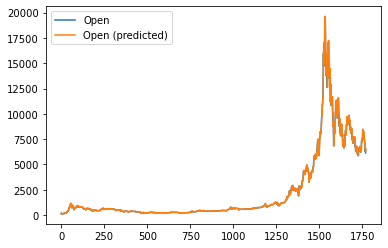

In [79]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.dates import drange

plt.plot(df.index[::-1], df["Open"], label="Open")
plt.plot(df.index[::-1], df["Open_predicted"], label="Open (predicted)")

plt.legend()

plt.show()

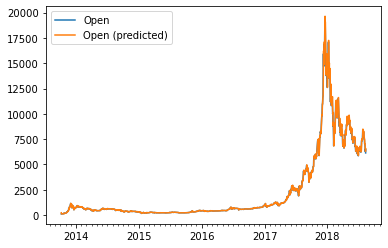

In [84]:
import matplotlib.pyplot as t
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator() 
months = mdates.MonthLocator()
yearsFmt = mdates.DateFormatter('%Y')

ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
    
dates = np.array(df["Date"]).astype(np.datetime64)

plt.plot(dates, df["Open"], label="Open")
plt.plot(dates, df["Open_predicted"], label="Open (predicted)")

plt.legend()

plt.show()